Parte 1:

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|

In [84]:
#Importando as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree


In [2]:
#Carregando a base de dados

df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
#Obtendo informações gerais do DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [4]:
#Análises estátisticas preliminares

df.describe()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia
count,16650.000000,16650.000000,16650.000000,16650.0,16650.000000,16650.000000,16650.000000,16650.000000
mean,0.433153,44.319513,-161.416446,1.0,0.225225,0.295676,0.088889,2.211892
std,0.739395,11.228837,376.843912,0.0,0.417743,0.456360,0.284592,0.903755
min,0.000000,22.030137,-1000.665753,1.0,0.000000,0.000000,0.000000,1.000000
25%,0.000000,34.873973,1.183562,1.0,0.000000,0.000000,0.000000,2.000000
50%,0.000000,43.493151,4.691781,1.0,0.000000,0.000000,0.000000,2.000000
75%,1.000000,53.410959,9.088356,1.0,0.000000,1.000000,0.000000,3.000000
max,14.000000,68.909589,42.906849,1.0,1.000000,1.000000,1.000000,15.000000


A partir da análise estatística preliminar notamos que a média da idade dos nossos clientes é de 44 anos.


Iremos visualizar a distribuição de algumas variáveis em nossa base de dados, desta forma, tentaremos obter alguns insights preliminares:

False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


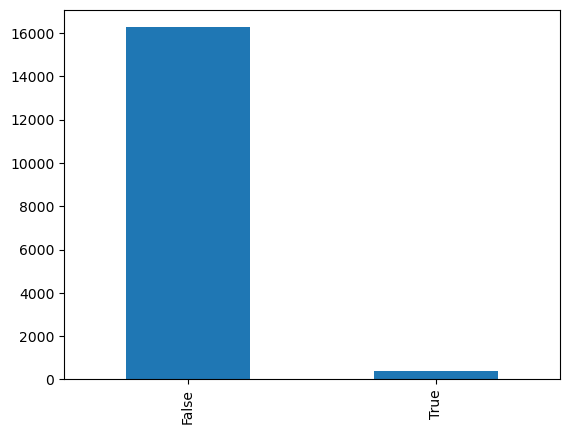

In [5]:


grafico_barras = df['mau'].value_counts().plot.bar()

print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

Acima, podemos notar que um percentual muito significante dos clientes dessa base de dados estão na categoria False, o que neste contexto significa: bons pagadores.

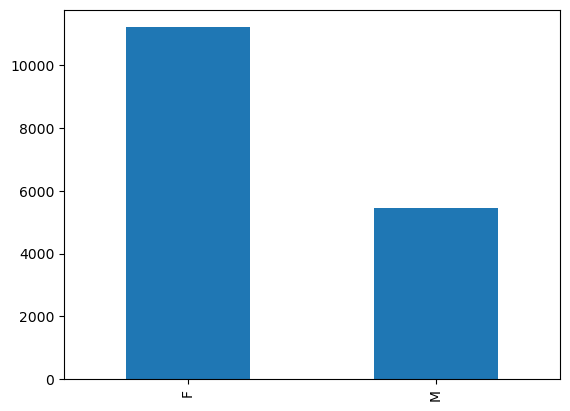

In [6]:
grafico_barras = df['sexo'].value_counts().plot.bar()

Acima, notamos que temos uma base significantemente maior (quase 100% a mais) de clientes do sexo feminino. 
A partir dessa breve análise e em acordo com o time de negócios, já podemos pensar em ações que sejam atrativas para ambas as bases de clientes.

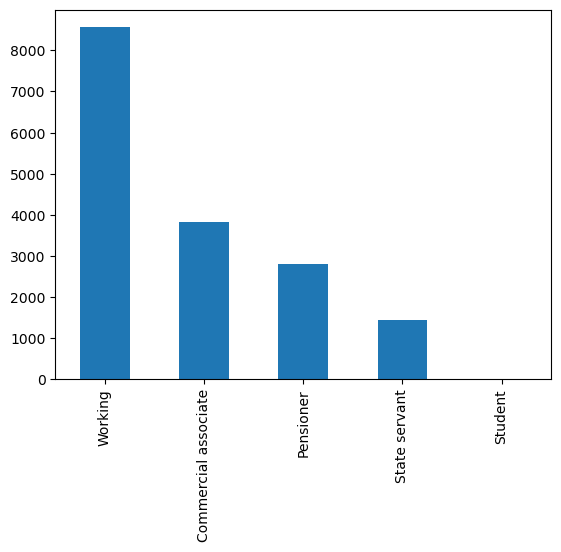

In [7]:
grafico_barras = df['tipo_renda'].value_counts().plot.bar()

Em ordem decrescente a ocupação dos nossos clientes: trabalhador, empresário, pensionista, servidor estadual e estudantes;
Atrvés dessa análise preliminar também podemos pensar em ações direcionadas aos nossos públicos específicos.

<Figure size 640x480 with 0 Axes>

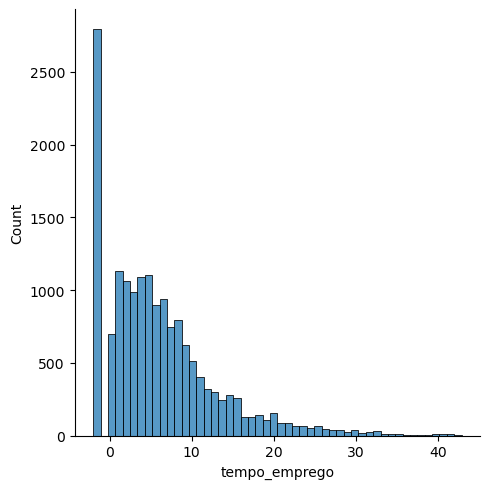

In [9]:
plt.clf()
var = "tempo_emprego"

df.loc[df[var]<0,var] = -2

sns.displot(df, x = var, bins = 50)
plt.show()

Também notamos que a maior parte dos nossos clientes possuem uma atividade profissional entre 1 e 8 anos

<Figure size 640x480 with 0 Axes>

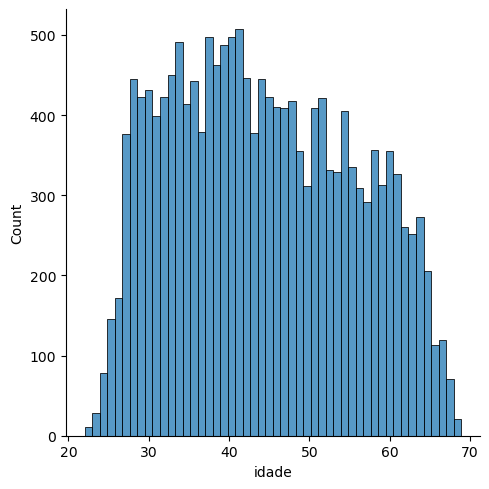

In [10]:
plt.clf()
var = "idade"

sns.displot(df, x = var, bins = 50)
plt.show()

A distribribuição da idade é bastante homogênea, porém, concentra-se mais nas faixas entre 28 e 57 anos de idade.

Entender a alteração da inadimplência indicada pela variável resposta (AtrasoRelevante2anos) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.

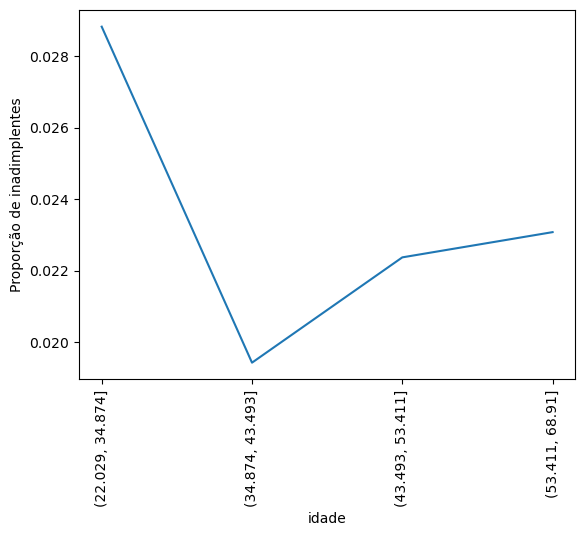

In [11]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

Entre aprox. 35 e 43 anos encontramos a faixa etária com o menor número de inadimplência.
Por outro lado, entre as faixas dos 22 aos 34 anos encontramos a maior parte dos clientes inadimplentes.
Isso pode sugerir que clientes mais novos possuem menos tempo de fonte de renda e ainda pouca estabilidade financeira.
Seria importante, jutamente com as equipes de negócios, sugerir ações que poderiam melhorar esses percentuais:
Algumas dessas ações poderiam ser: menor oferta de crédito e maior prazo/facilidades de pagamento para clientes com maior probabilidade de inadimplência, e ações para aumentar a oferta de crédito, taxas de juros especiais e estímulo ao consumo para clientes com maior poder de compra e estabilidade financeira.


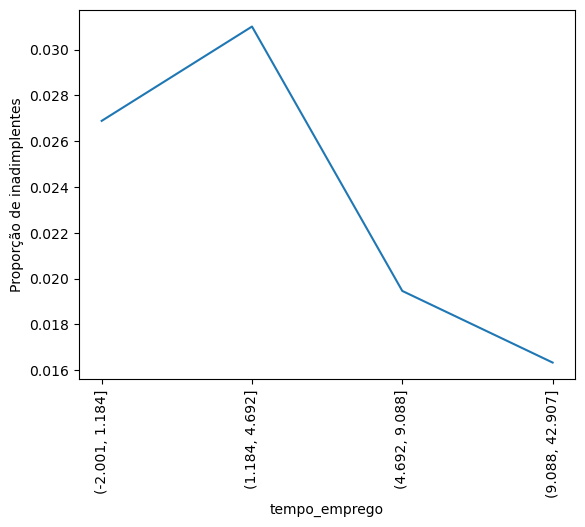

In [12]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

No gráfico acima, fica evidente que a maior taxa de clientes inadimplentesé maior entre aqueles entre 1.18 e 4.69 anos de emprego.
A tendência de clientes inadimplentes diminui conforme aumenta o tempo de emprego

In [13]:
#Analisando os tipos de dados e a quantidade de categorias
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [ ]:
# Atualizando o df com as colunas codificadas one-hot correspondentes às colunas de objeto.

In [15]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [16]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [17]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,0,1,0,0,0,0,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,0,0,0,0,0,0,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Selecionando a variável "mau" como variável resposta

x = df.drop("mau",axis = 1)
y = df["mau"]

# Aplicando a função train_test_split sobre as variáveis para treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y)


In [20]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
7117,1,39.931507,5.879452,1,0,0,1,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
13678,2,47.627397,3.117808,1,0,0,0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
11750,1,33.139726,1.575342,1,0,0,0,3.0,1,0,...,0,0,0,0,0,0,0,0,0,1
14685,0,64.983562,-2.000000,1,0,1,0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2359,0,37.041096,15.035616,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7816,0,46.561644,19.901370,1,0,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4184,0,58.473973,-2.000000,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
15898,1,35.772603,2.879452,1,0,0,0,2.0,1,0,...,0,0,1,0,0,0,0,1,0,0
15654,0,50.358904,6.715068,1,0,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Treinando uma Random Forest com 20 árvores

clf = RandomForestClassifier(n_estimators=20)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [22]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.77%


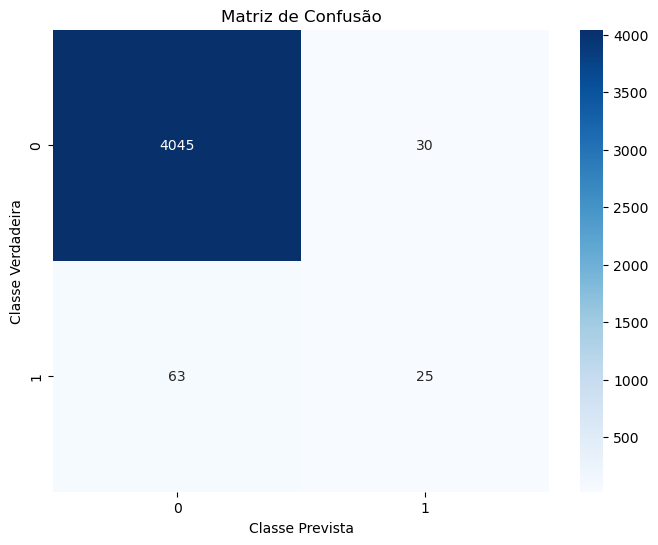

In [25]:
#Gerando a Matriz de Confusão

confusion_mtx = confusion_matrix(y_test, y_pred)

# Plotando a Matriz de Confusãi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

Interpretando os resultados da Matriz de Confusão:
* 4045 amostras foram classificadas corretamente como verdadeiro positivo
* 30 amostras foram erroneamente classificadas como falso positivo
* 63 amostras foram erroneamente classificadas como a classe verdadeira como falso negativo
* 25 amostras foram classificadas corretamente como verdadeiro negativo.

In [28]:
# Treinando uma Random Forest com 10 árvores

clf = RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [29]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 98.03%


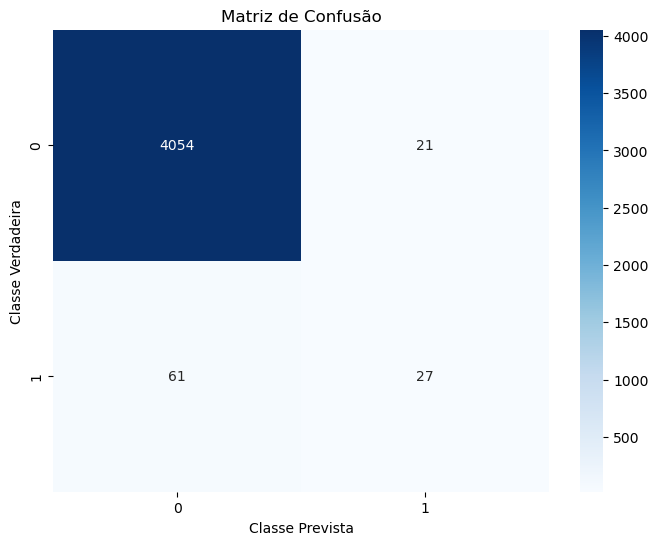

In [30]:
#Gerando a Matriz de Confusão

confusion_mtx = confusion_matrix(y_test, y_pred)

# Plotando a Matriz de Confusãi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

Interpretando a Matriz do Confusão

* 4054 amostras classificadas corretamente como a classe verdadeira representada pela primeira linha da matriz.
* 21 amostras erroneamente classificadas como a classe representada pela segunda coluna da matriz (falsos positivos).
* 61 amostras erroneamente classificadas como a classe verdadeira representada pela segunda linha da matriz (falsos negativos).
* 27 amostras corretamente classificadas como a classe representada pela segunda coluna da matriz.

Parte 2:

1- As variáveis
2- Tipos de dados de cada variável
3- Quantidade de missings
4- Distribuição da variável resposta (mau)

5- Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
6- Adicione uma coluna nesse dataframe chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. Dica: 1. inicie uma lista vazia 2. faça um for ao longo dos nomes das variáveis, 3. conte o número de categorias dessa variável 4. acumule essa informação de 
7- na lista que você criou em 1. 5. No final, essa lista pode ser atribuída à nossa variável.
8- Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.


In [32]:
#carregando a base de dados
df = pd.read_csv('demo01.csv') 

In [33]:
#Verificando o DF
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [34]:
#verificando as colunas
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [35]:
#verificando a quantidade de valores missing
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [36]:
#verificando a distribuição da variável mau
df['mau'].value_counts() 

False    16260
True       390
Name: mau, dtype: int64

<Axes: xlabel='mau', ylabel='count'>

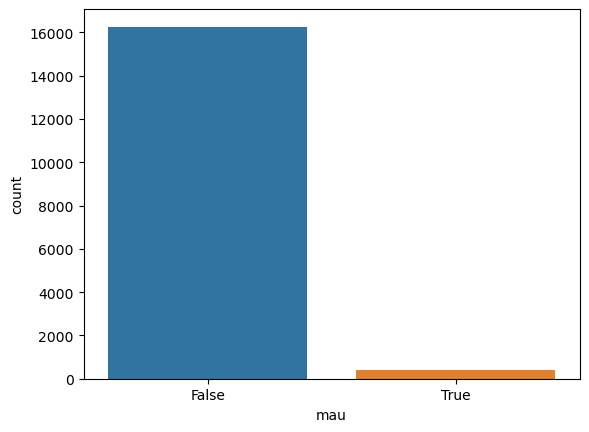

In [37]:
#gerando um gráfico da distribuição da variável 'mau'
sns.countplot(x='mau', data=df) 


In [40]:
#criando uma variável que contem uma lista com as colunas
colunas = df.columns.to_list()

In [41]:
df_cat = list(map(lambda x: df[x].dtype, colunas)) 

In [42]:
df_cat = pd.DataFrame(df_cat, index=colunas,columns=['type'])

In [43]:
#perceba que os índices são nomeados conforme as colunas da lista df_cat (função lambda) 
#a coluna única é "type" conforme atribuído ao código acima
df_cat 

,type
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


Um novo DataFrame será criado com os valores somados de cada categoria do DF anterior da coluna type, mas primeiro utilizaremos novamente uma função lambda a partir da variável df_val. *uma nova lista será criada (e atribuída na variável df_val). *a função map mapeará todos os elementos de df[x]unique() - o x receberá como segundo argumento os valores únicos de (colunas) através da função nunique()

In [44]:
df_val = list(map(lambda x: df[x].nunique(), colunas))

Aqui construiremos o novo DF - pd.DataFrame - atribuído à variável df_val neste novo DF serão atribuídos os valores da lista (criada anteriormente em df_val) os índices novamente serão as colunas, as linhas serão a soma dos valores únicos e o nome da coluna será qtd_categorias criada pela função columns=['qtd_categorias']

In [45]:
df_val = pd.DataFrame(df_val, index=colunas, columns=['qtd_categorias'])

In [46]:
#Aqui temos o novo DF onde os índices são as colunas correspondentes do DF original 
#Aa nova coluna qtd_decategorias possui os valores únicos e somados de cada categoria.
df_val 

,qtd_categorias
sexo,2
posse_de_veiculo,2
posse_de_imovel,2
qtd_filhos,8
tipo_renda,5
educacao,5
estado_civil,5
tipo_residencia,6
idade,5298
tempo_emprego,3005


In [47]:
df_meta = pd.concat([df_val, df_cat], axis=1)
# Para tornar a visualização ainda mais intuitiva...
# concatemos os dois DFs criados anteriormenteem um novo DF chamado 'df_meta'
df_meta # 

,qtd_categorias,type
sexo,2,object
posse_de_veiculo,2,object
posse_de_imovel,2,object
qtd_filhos,8,int64
tipo_renda,5,object
educacao,5,object
estado_civil,5,object
tipo_residencia,6,object
idade,5298,float64
tempo_emprego,3005,float64


Criaremos variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Craremos um dataframe com apenas as variáveis apropriadas para entrada no scikitlearn - eliminando as variáveis tipo str, mantendo apenas suas versões dummy.


In [53]:
var_qualitativas = []

In [54]:
df_dummies = pd.get_dummies(df, columns = var_qualitativas, drop_first=True)

Como boa prática, removeremos as variáveis originais, para garantir que nenhum elemento do tipo string permaneça no novo DF, assim manteremos apenas as versões dummy. Para isso selecionaremos as colunas do DataFrame que são do tipo 'object' e a excluiremos com um df_dummies.select_dtypes(exclude = 'object')

In [56]:
df_dummies = df_dummies.select_dtypes(exclude = 'object')

In [57]:
df_dummies

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,58.832877,3.106849,1,0,0,0,2.0,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True
16646,0,43.389041,7.380822,1,1,1,0,2.0,True
16647,0,30.005479,9.800000,1,1,0,0,2.0,True
16648,0,30.005479,9.800000,1,1,0,0,2.0,True


A tabela cruzada mostrará a contagem de observações para cada combinação de categorias das duas variáveis. Podemos calcular a frequência relativa ou a proporção para a categoria mau = 1 em relação a cada categoria da variável em questão.

Assim, criaremos dois DF que utilizarão o parâmetro normalize='index. Este parâmetro é útil quando queremos examinar as proporções dentro de cada categoria da variável independente (no nosso caso, possui_email e posse_de_veiculo) em relação à variável dependente (no nosso caso, mau).

Ao usar normalize='index', cada valor na tabela cruzada é dividido pela soma dos valores na mesma linha, para que cada linha some 1. Dessa forma, podemos interpretar os valores resultantes como proporções ou porcentagens.

In [58]:
cross_tab = pd.crosstab(df['possui_email'], df['mau'], normalize='index')
print('Tabela cruzada - possui e-mail')
print(cross_tab)

cross_tab = pd.crosstab(df['posse_de_veiculo'], df['mau'], normalize='index')
print("\nTabela cruzada - Posse de Veículo:")
print(cross_tab)

Tabela cruzada - possui e-mail
mau              False     True 
possui_email                    
0             0.976269  0.023731
1             0.979730  0.020270

Tabela cruzada - Posse de Veículo:
mau                  False     True 
posse_de_veiculo                    
N                 0.975732  0.024268
Y                 0.977905  0.022095


Com base na tabela acima, podemos chegar as seguintes conclusões:
Interpretando as tabelas cruzadas:

*possui e_mail x mau: Dos que NÃO possuem e_mail:(0) 97,6% são bons pagadores (False), e 2,3% maus pagadores (True) Dos que POSSUEM e-mail:(1) 97,9% são bos pagadores (False), e 2.0% maus pagadores (True)

*posse_de_veiculo Dos que não possuem veículo: (N) 97,5 são bons pagadores, e 2,4% maus pagadores (True) Dos que possuem veículo: (Y) 97,7% são bons pagadores (False), e 2,2% maus pagadores (True)

Podemos concluir que, pessoas que não possuem e-amil e também não possuem carro têm uma leve tendência a serem maus pagadores.

In [60]:
#Salvando do DF com as variáveis dummies:
df_dummies.to_csv('df_dummies.csv', index=False)

Parte 3:
1 - Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta mau e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).
2 - Defina um objeto com a função da árvore de decisão vista em aula.
3 - Treine o modelo com os dados que você separou para treinamento.
4 - Visualize a árvore. Talvez você queira aumentar um pouco a figura.
5 -Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
6 - Calcule a acurácia na base de treinamento
7 - Classifique a base de teste de acordo com a árvore que você treinou no item 2.
8 - Produza a visualização da matriz de confusão para a base de teste.
9 - Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
10 - Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
11 Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [62]:
#Abrindo o DF dummies
df = pd.read_csv('df_dummies.csv')
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,58.832877,3.106849,1,0,0,0,2.0,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True
16646,0,43.389041,7.380822,1,1,1,0,2.0,True
16647,0,30.005479,9.800000,1,1,0,0,2.0,True
16648,0,30.005479,9.800000,1,1,0,0,2.0,True


In [63]:
#Separando a base de dados sendo y o target
X = df.drop('mau', axis = 1)
y = df['mau']

In [64]:
#Dividindo a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# Criando o objeto da árvore de decisão
arvore_decisao = DecisionTreeClassifier()

# Treinando o modelo com os dados de treinamento
arvore_decisao.fit(X_train, y_train)

DecisionTreeClassifier()

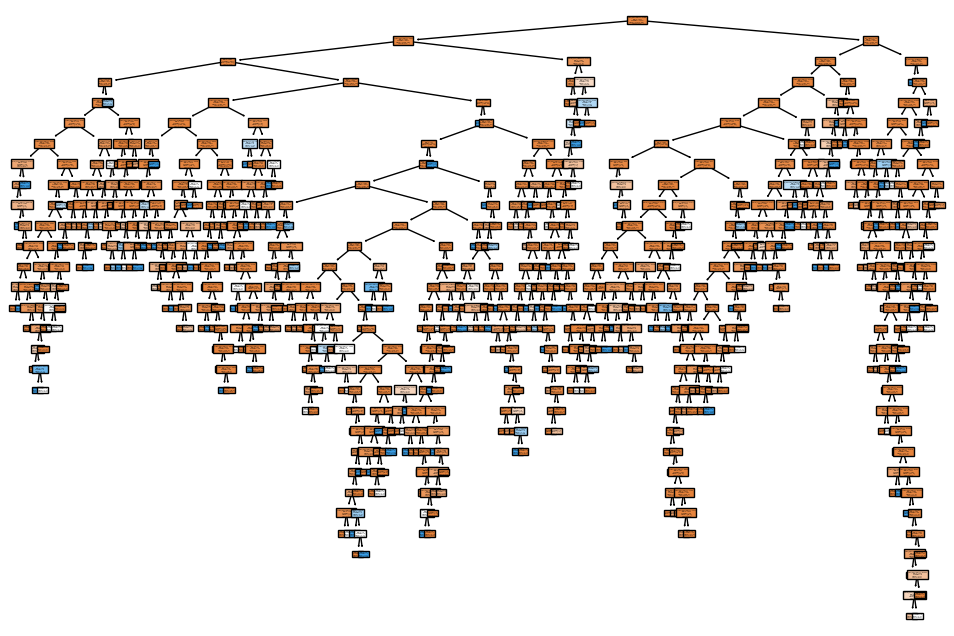

In [68]:
#Plotando o esquema da árvore de decisão
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(arvore_decisao, feature_names=X_train.columns, class_names=[str(c) for c in arvore_decisao.classes_], filled=True)
plt.show()

In [69]:
# Realizando as previsões no conjunto de validação
y_pred = arvore_decisao.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

# Realize as previsões no conjunto de treinamento
y_train_pred = arvore_decisao.predict(X_train)

# Calcule a acurácia
acuracia_train = accuracy_score(y_train, y_train_pred)

print(f"Acurácia na base de treinamento: {acuracia_train:.4f}")

Acurácia na base de treinamento: 0.9900


In [70]:
# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

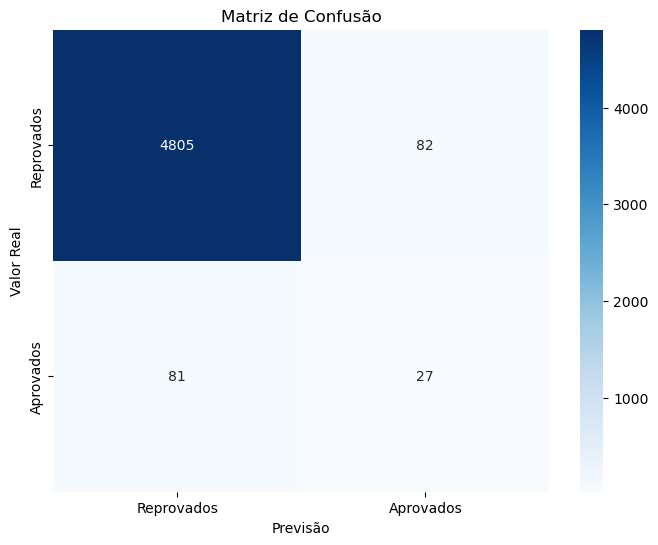

In [72]:
# Definindo os rótulos dos eixos
labels = ['Reprovados', 'Aprovados']

# Criando o mapa de calor da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Definindo os rótulos dos eixos
plt.xlabel('Previsão')
plt.ylabel('Valor Real')

# Defina o título do gráfico
plt.title('Matriz de Confusão')

# Exiba o mapa de calor
plt.show()

Interpretando a Matriz do Confusão:

* 4085 amostras classificadas corretamente como pertencentes a essa classe (verdadeiros positivos)
* 82 amostras erroneamente classificadas como pertencentes a essa classe (falsos positivos).
* 81 amostras erroneamente classificadas como pertencentes a essa classe (falsos negativos)
* 27 amostras corretamente classificadas como pertencentes a essa classe (verdadeiros negativos)


In [73]:
# Classificar a base de teste
y_test_pred = arvore_decisao.predict(X_test)

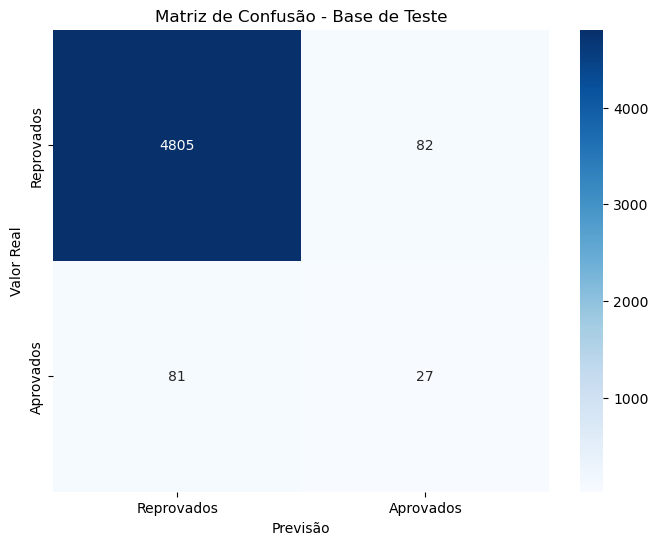

In [75]:
#Criando a matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)

# Definindo os rótulos dos eixos
labels = ['Reprovados', 'Aprovados']

# Criando o mapa de calor da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Definindo os rótulos dos eixos
plt.xlabel('Previsão')
plt.ylabel('Valor Real')

# Defininindo o título do gráfico
plt.title('Matriz de Confusão - Base de Teste')

# Exibindo o mapa de calor
plt.show()

In [76]:
# Calcular a acurácia da base de teste
acuracia_teste = accuracy_score(y_test, y_test_pred)

# Calcular a acurácia da base de treinamento (previamente calculada)
print(f"Acurácia na base de treinamento: {acuracia_train:.4f}")

# Exibir a acurácia da base de teste
print(f"Acurácia na base de teste: {acuracia_teste:.4f}")

Acurácia na base de treinamento: 0.9900
Acurácia na base de teste: 0.9674


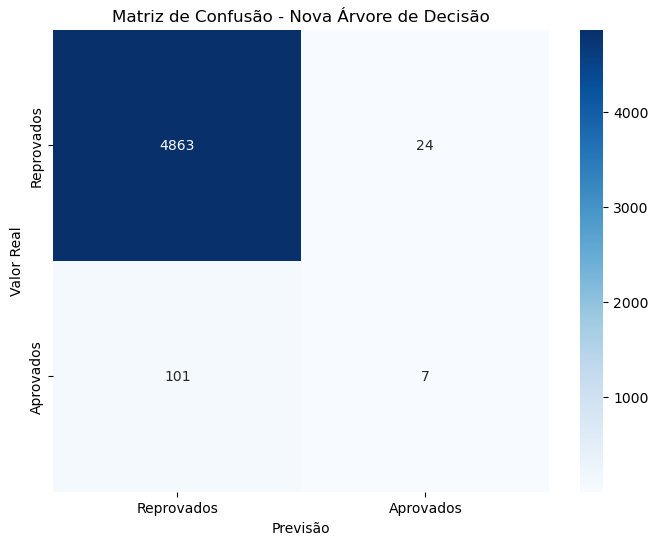

In [77]:
# Criar o objeto da árvore de decisão com os parâmetros desejados
nova_arvore_decisao = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar o modelo com os dados de treinamento
nova_arvore_decisao.fit(X_train, y_train)

# Realizar as previsões na base de teste
y_test_pred = nova_arvore_decisao.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)

# Definir os rótulos dos eixos
labels = ['Reprovados', 'Aprovados']

# Exibir a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Nova Árvore de Decisão')
plt.show()

Interpretando os valores da Matriz do Confusão:

* 4863 amostras classificadas corretamente como pertencentes a essa classe (verdadeiros positivos)
* 24 amostras erroneamente classificadas como pertencentes a essa classe (falsos positivos).
* 101 amostras erroneamente classificadas como pertencentes a essa classe (falsos negativos)
* 7 amostras corretamente classificadas como pertencentes a essa classe (verdadeiros negativos)

In [83]:
#Acurácia do modelo:

accuracy = accuracy_score(y_test, y_test_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.974974974974975


In [78]:
#Verificando a porcentagem de maus pagadores:
proporcao_maus = sum(y_test_pred == 1) / len(y_test_pred)
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.4f}")

Proporção de proponentes classificados como 'maus': 0.0062


In [82]:
# Verificando a porcentagem de bons pagadores:

# Criar uma matriz de previsões com todos os valores iguais a 0 (representando "bons")
y_pred_all_good = np.zeros_like(y_test_pred)

# Calcular a acurácia
acuracia_all_good = accuracy_score(y_test, y_pred_all_good)

print(f"Acurácia ao classificar todos os contratos como 'bons': {acuracia_all_good:.4f}")


Acurácia ao classificar todos os contratos como 'bons': 0.9784
